<a href="https://colab.research.google.com/github/muajnstu/Regression-related-Mini-project/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/muajnstu/Regression-related-Mini-project/refs/heads/main/data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
missing_values=df.isnull().sum()

missing_values=missing_values[missing_values>0]
if missing_values.empty:
    print("There are no missing values in any of the columns")
else:
    print("Columns with missing values:\n",missing_values)

There are no missing values in any of the columns


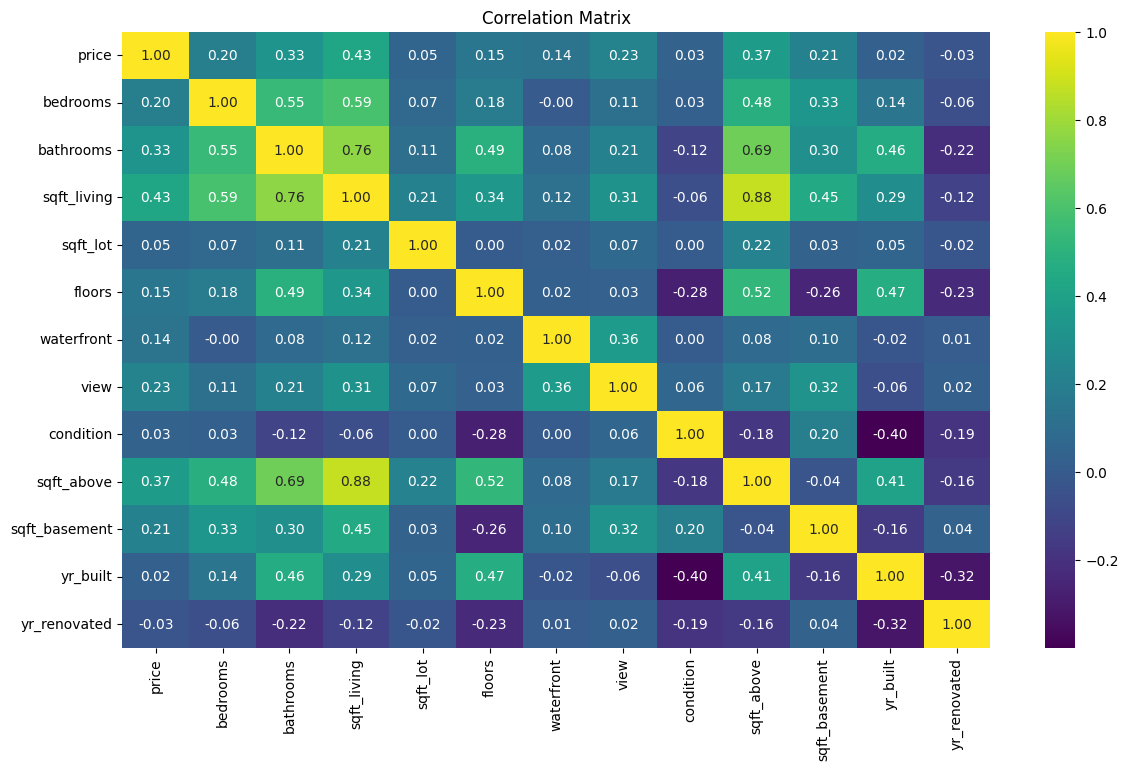

In [8]:
numerical_cols=df.select_dtypes(include=["float64","int64"])
corr_matrix=numerical_cols.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

* There is a weak positive relationship between the number of bedrooms and the house price, suggesting that having more bedrooms is somewhat associated with higher prices. The number of bathrooms shows a slightly stronger positive association with price, indicating a clearer link between additional bathrooms and increased value. The living area displays an even stronger positive correlation with price, meaning larger homes tend to be more expensive. Conversely, the relationship between the year built and the house condition is negative, implying that older homes generally have lower condition ratings.

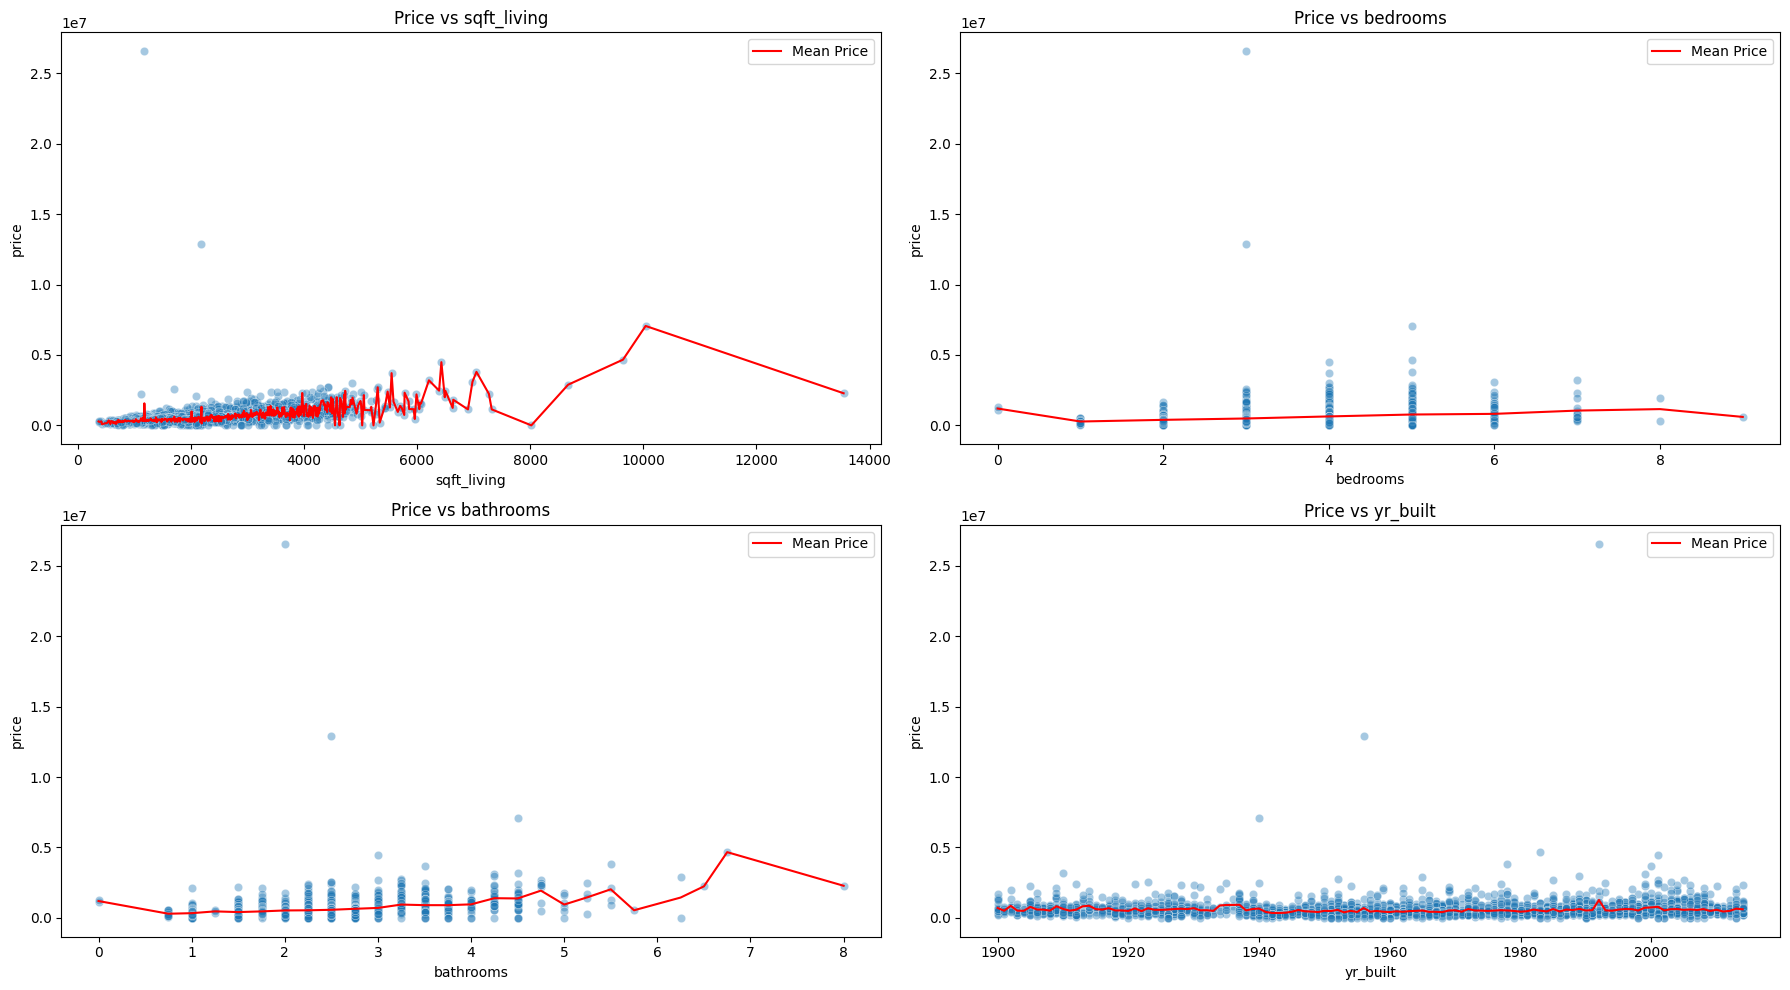

In [ ]:
features=["sqft_living","bedrooms","bathrooms","yr_built"]

plt.figure(figsize=(18,10))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feature], y=df["price"], alpha=0.4)

    mean_data=df.groupby(feature)["price"].mean().reset_index()
    sns.lineplot(x=mean_data[feature],y=mean_data["price"],color="red",label="Mean Price")

    plt.title(f"Price vs {feature}")
    plt.legend()

plt.tight_layout()
plt.show()

Outlier Detection

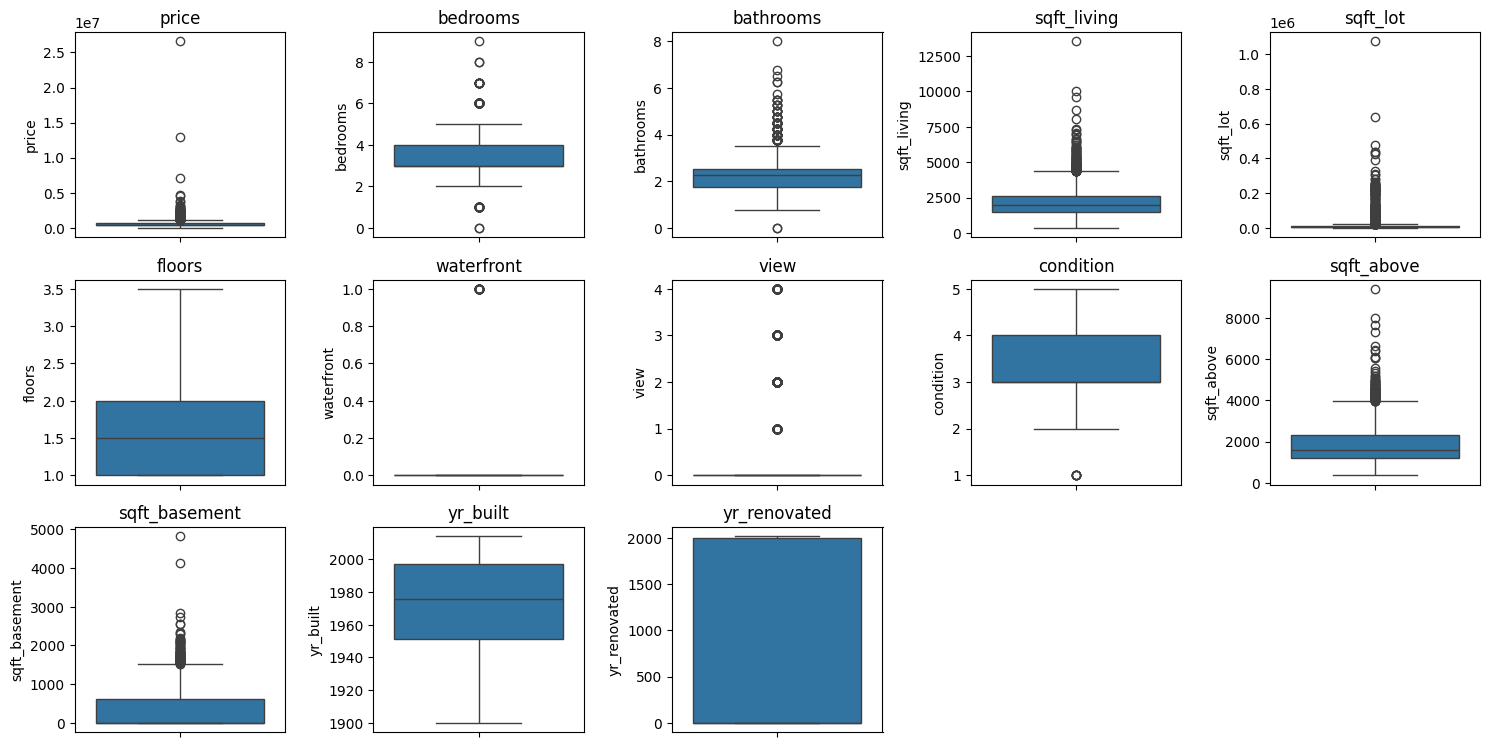

In [ ]:
numeric_df=df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_df.columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned=df.copy()

for col in numeric_df.columns:
    Q1=df_cleaned[col].quantile(0.25)
    Q3=df_cleaned[col].quantile(0.75)
    IQR=Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (4600, 18)
Cleaned dataset shape: (3316, 18)


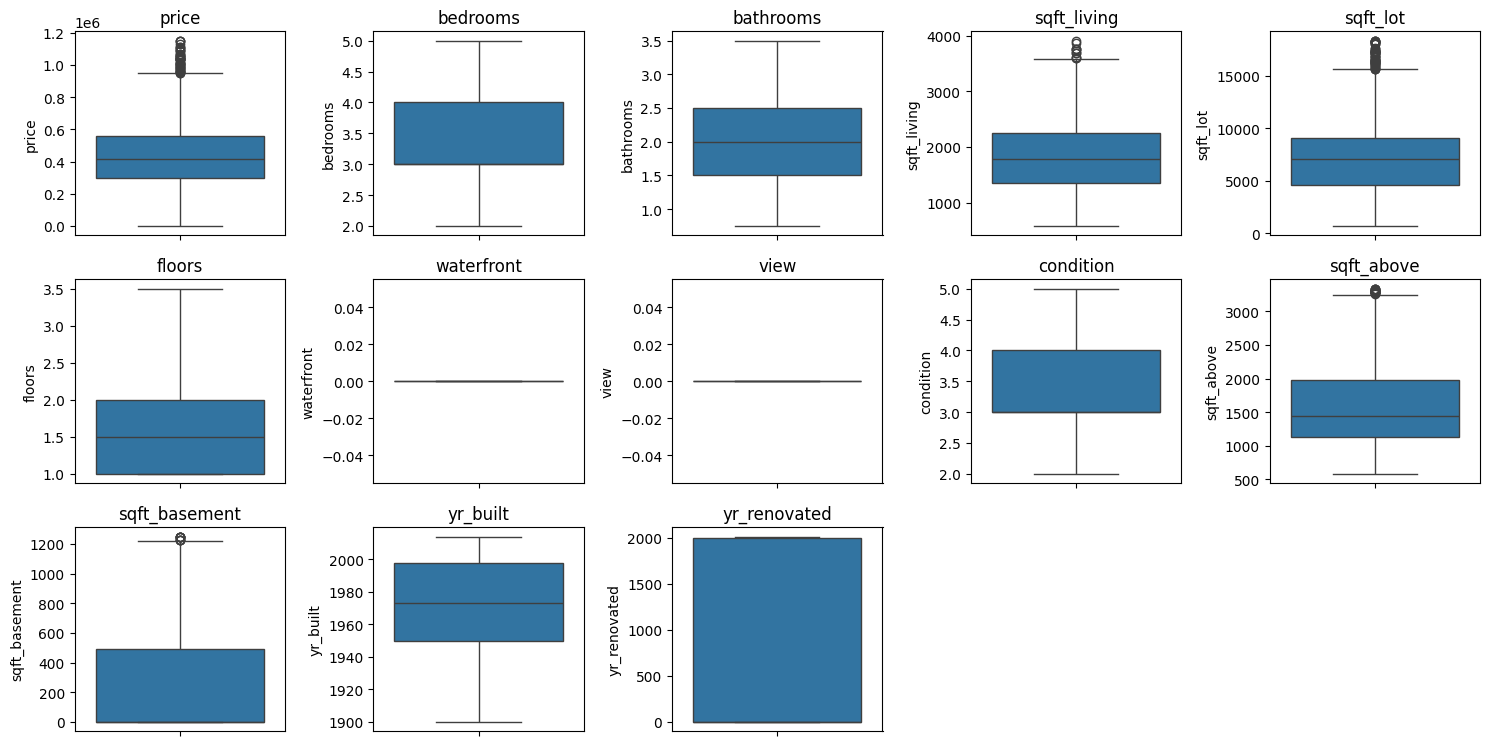

In [ ]:
numeric_df=df_cleaned.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_df.columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# Data Preparation

In [ ]:
df = df_cleaned.copy()

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = pd.get_dummies(df, columns=['street', 'city', 'statezip', 'country'], drop_first=True)

X = df.drop(['price', 'date'], axis=1)
y = df['price']

num_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront','view','condition','sqft_above','sqft_basement',
            'yr_built','yr_renovated','year','month','day']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Model Building & Evaluation

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "Elastic Net": ElasticNet(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Huber Regressor": HuberRegressor(),
    "TheilSen Regressor": TheilSenRegressor(random_state=42),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(random_state=42),
    "Partial Least Squares Regression": PLSRegression(),
    "Gaussian Process Regressor": GaussianProcessRegressor(random_state=42),
    "Hist Gradient Boosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

print("\nModel Performance Comparison:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}")
    print("-" * 20)

Training Linear Regression...
Linear Regression - MSE: 14437640959.1896, RMSE: 120156.7350, R2 Score: 0.6215
Training Decision Tree...
Decision Tree - MSE: 18785406940.6445, RMSE: 137059.8663, R2 Score: 0.5075
Training Random Forest...
Random Forest - MSE: 9543115908.1960, RMSE: 97688.8730, R2 Score: 0.7498
Training Gradient Boosting...
Gradient Boosting - MSE: 10290018367.0290, RMSE: 101439.7278, R2 Score: 0.7302
Training XGBoost...
XGBoost - MSE: 8449869270.3961, RMSE: 91923.1705, R2 Score: 0.7785
Training Ridge...
Ridge - MSE: 7988045679.6689, RMSE: 89375.8674, R2 Score: 0.7906
Training Lasso...
Lasso - MSE: 8305862451.4272, RMSE: 91136.5045, R2 Score: 0.7823
Training Elastic Net...
Elastic Net - MSE: 20419301971.6430, RMSE: 142896.1230, R2 Score: 0.4647
Training Support Vector Regressor...
Support Vector Regressor - MSE: 38926311634.3630, RMSE: 197297.5206, R2 Score: -0.0205
Training K-Nearest Neighbors...
K-Nearest Neighbors - MSE: 17967238190.1183, RMSE: 134041.9270, R2 Score: 0.